# Курс «Моделирование турбулентности и горения»

### «Исследование турбулентного пограничного слоя на плоской пластине»

Стулов Илья Сергеевич М8O-207М-23

**Исходные данные:**

Результаты измерения значений продольной скорости в зависимости от расстояния до плоской пластины u(y) – таблица 1. Измерения произведены трубкой Пито, результаты измерений приведены в виде показаний милливольтметра, подключённого к дифференциальному датчику давления. Расстояния от начала пластины до координаты измерения профиля – x. Температура T0 и давление p0 набегающего потока.



### 1) С помощью тарировочной зависимости (таблица 2) перевести показания из мВ в м/с, пользуясь линейной интерполяцией.

In [59]:
import numpy as np
from scipy.interpolate import interp1d
import pandas as pd

# Расстояния до стенки в мм
y_measurements = np.array([0, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 1, 1.5, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20])
# Показания милливольтметра
measurements_mv = np.array([800, 955, 959, 962, 970, 979, 988, 996, 1008, 1019, 1023, 1029, 1044, 1053, 1071, 1083, 1097, 1110, 1121, 1134, 1141, 1149, 1160, 1170, 1171, 1171, 1171])  # Пример показаний в мВ
# Тарировочная зависимость
# Показания в мВ
calibration_mv = np.array([800, 805, 810, 815, 820, 825, 830, 835, 840, 850, 875, 895, 935, 985, 1025, 1070, 1120])  
# Скорость в м/с
calibration_speed = np.array([0, 1.28, 1.81, 2.22, 2.56, 2.86, 3.13, 3.38, 3.62, 4.04, 4.95, 5.72, 7, 8.09, 9.04, 9.91, 10.69])  

# Линейная интерполяция
interp_func = interp1d(calibration_mv, calibration_speed, kind='linear', fill_value="extrapolate")

# Перевод показаний милливольтметра в скорость
speeds_ms = interp_func(measurements_mv)

# Соответствие расстояния и скорости
data = pd.DataFrame({
    'Расстояние до стенки (мм)': y_measurements,
    'Скорость (м/с)': speeds_ms
})

# Вывод таблицы
print(data)


    Расстояние до стенки (мм)  Скорость (м/с)
0                        0.00        0.000000
1                        0.20        7.436000
2                        0.25        7.523200
3                        0.30        7.588600
4                        0.35        7.763000
5                        0.40        7.959200
6                        0.45        8.161250
7                        0.50        8.351250
8                        0.60        8.636250
9                        0.70        8.897500
10                       0.80        8.992500
11                       1.00        9.117333
12                       1.50        9.407333
13                       2.00        9.581333
14                       3.00        9.925600
15                       4.00       10.112800
16                       5.00       10.331200
17                       6.00       10.534000
18                       7.00       10.705600
19                       8.00       10.908400
20                       9.00     

### 2) Определить толщину пограничного слоя δ как расстояние от поверхности, на котором скорость составляет 0.99 от скорости невозмущённого потока u0.


In [60]:
# Определение скорости невозмущённого потока u0, это максимальное значение из измеренных данных,
# так как это обычно соответствует значению скорости на некотором расстоянии от пластины (где влияние пограничного слоя минимально)
# можно заметить, что эта скорость стала более менее постоянной
u0 = np.max(speeds_ms)
print(f"Скорость невозмущенного потока : {u0} м/с")
# Определение толщины пограничного слоя δ
target_speed = 0.99 * u0
print(f"0,99 от скорости невозмущенного потока : {target_speed:.3f} м/с")
# Линейная интерполяция для нахождения расстояния y, на котором скорость составляет target_speed
interp_func_y = interp1d(speeds_ms, y_measurements, kind='linear', fill_value="extrapolate")

# Нахождение толщины пограничного слоя δ
delta = interp_func_y(target_speed)

print(f"Толщина пограничного слоя δ: {delta:.3f} мм")

Скорость невозмущенного потока : 11.485599999999998 м/с
0,99 от скорости невозмущенного потока : 11.371 м/с
Толщина пограничного слоя δ: 12.727 мм


### 3) Построить профиль относительной скорости от относительного расстояния u/u0=f(y/δ).

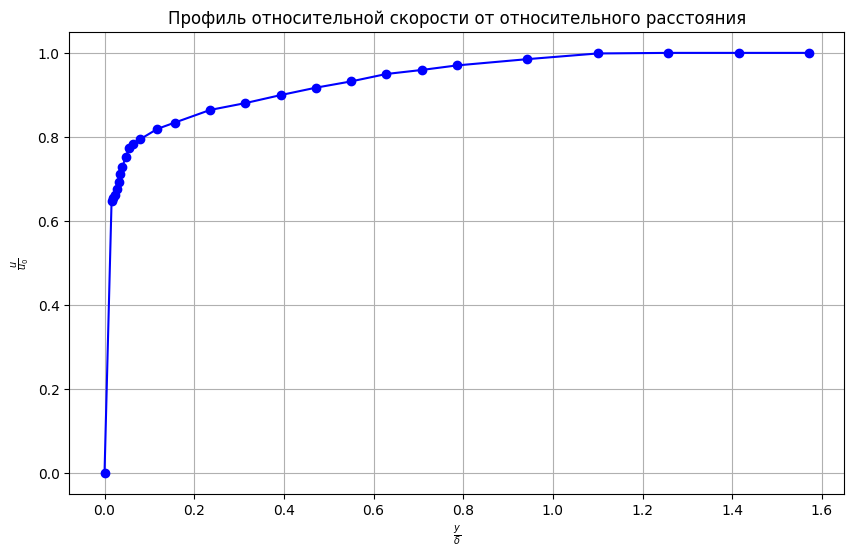

In [61]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
# Нормализация скоростей и расстояний
u_normalized = speeds_ms / u0
y_normalized = y_measurements / delta

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(y_normalized, u_normalized, marker='o', linestyle='-', color='b')
plt.xlabel(r'$\frac{y}{\delta}$')
plt.ylabel(r'$\frac{u}{u_0}$')
plt.title('Профиль относительной скорости от относительного расстояния')
plt.grid(True)
plt.show()

### 4) Аппроксимировать полученную зависимость степенной функцией u/u0=(y/δ)n. На одном графике точками показать значения из п.3 и линией аппроксимационную зависимость, указать выбранное значение n.

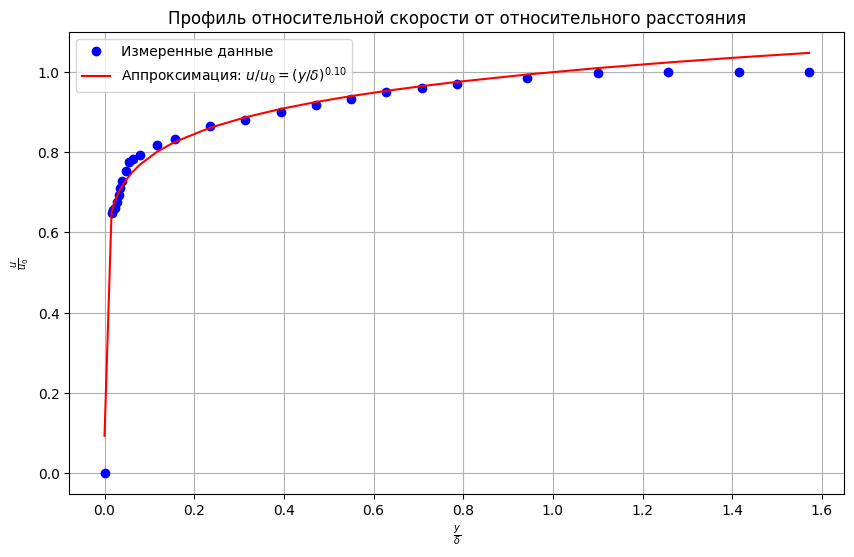

Значение n: 0.10


In [62]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
# Добавление небольшого значения к нулевым элементам (для того, чтобы ошибку не выдавало при построении графика)
epsilon = 1e-10
u_normalized = np.where(u_normalized == 0, epsilon, u_normalized)
y_normalized = np.where(y_normalized == 0, epsilon, y_normalized)

# Функция, к которой будем подгонять данные
def power_law(x, n):
    return x**n

# Линейная регрессия для нахождения n (функция curve_fit предназначена для подгонки (аппроксимации) данных к заданной функции)
popt, _ = curve_fit(power_law, y_normalized, u_normalized)
n = popt[0]

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(y_normalized, u_normalized, marker='o', linestyle='', color='b', label='Измеренные данные')
plt.plot(y_normalized, power_law(y_normalized, n), linestyle='-', color='r', label=f'Аппроксимация: $u/u_0 = (y/\\delta)^{{{n:.2f}}}$')
plt.xlabel(r'$\frac{y}{\delta}$')
plt.ylabel(r'$\frac{u}{u_0}$')
plt.title('Профиль относительной скорости от относительного расстояния')
plt.legend()
plt.grid(True)
plt.show()

print(f"Значение n: {n:.2f}")

### 5) Вычислить толщину вытеснения:


 $$
\delta^{*} = \int_{0}^{\infty} \left(1 - \frac{u}{u_0}\right) dy ,	(1)
$$





а также толщину потери импульса:

$$
\delta^{**} = \int_{0}^{\infty} \left( 1 - \frac{u}{u_0} \right) \frac{u}{u_0} \, dy .	(2)
$$

Интегралы (1) и (2) можно оценить интегрированием полученной в п.4 зависимости или численным интегрированием (например, методом трапеций) дискретного профиля.

Определить формпараметр

 $$
H = \frac{\delta^{*}}{\delta^{**}}
$$
	.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import trapezoid
# Численное интегрирование методом трапеций
# Вычислим значения подинтегральных функций
integral1 = 1 - u_normalized
integral2 = u_normalized * (1 - u_normalized)
# Вычисляем значение определенного интеграла
delta_star = trapezoid(integral1, y_measurements)
delta_double_star = trapezoid(integral2, y_measurements)

# Определение формпараметра H
H = delta_star / delta_double_star

print(f"Толщина вытеснения δ*: {delta_star:.4f}")
print(f"Толщина потери импульса δ**: {delta_double_star:.4f}")
print(f"Формпараметр H: {H:.4f}")


Толщина вытеснения δ*: 1.2867
Толщина потери импульса δ**: 1.0093
Формпараметр H: 1.2749


### 6) Определить напряжение трения на стенке по методу Клаузера (часто используется при исследовании турбулентного пограничного слоя). 

Для этого в полулогарифмических координатах строят сетку кривых по следующему уравнению (см. рис.1) для различных значений uτ:
$$
u = 5.75 u_{\tau} \lg y + 5.75 u_{\tau} \lg \left( \frac{u_{\tau}}{v_0} \right) + 5.2 u_{\tau}
$$
которое следует из универсального уравнения, описывающего профиль в логарифмической области:
 $$ u^+ = 5.75 \lg y^+ + 5.2 $$
 Здесь  - коэффициент кинематической вязкости воздуха при T0 и p0 (определяется из таблицы вязкости воздуха при различных давлениях и температурах).

 На график с кривыми (3) наносится экспериментальный профиль скорости и по соответствию теоретическим кривым определяются размеры логарифмической области и значение uτ. По принятому значению uτ определить искомое напряжение на стенке:
  $$ \tau_w = \rho u_\tau^2 $$

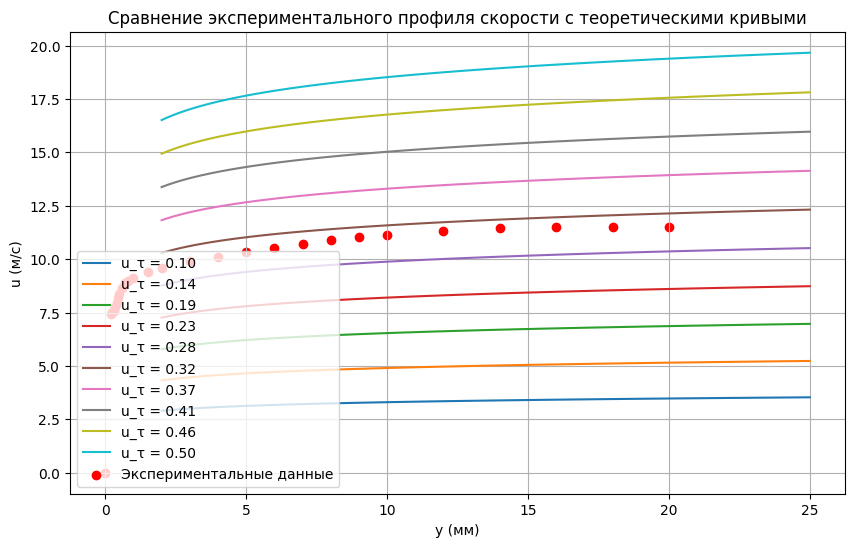

In [64]:
# Параметры воздуха
T0 = 288  # Температура в К
p0 = 101300  # Давление в Па
rho = 1.2272  # Плотность воздуха в кг/м^3 (при T0 и p0)
nu_0 = 1.45e-5  # Кинематическая вязкость воздуха в м^2/с (при T0 и p0)

# Значения u_tau для построения сетки кривых
u_tau_values = np.linspace(0.1, 0.5, 10)  # Рандомим значения u_tau от 0,1 до 0,5 10 кривых

# Построение сетки кривых
plt.figure(figsize=(10, 6))
for u_tau in u_tau_values:
    y = np.linspace(2, 25, 100)  # Диапазон значений y
    u_theory = 5.75 * u_tau * np.log10(y) + 5.75 * u_tau * np.log10(u_tau / nu_0) + 5.2 * u_tau
    plt.plot(y, u_theory, label=f'u_τ = {u_tau:.2f}')

# Добавление экспериментальных данных на график
plt.scatter(y_measurements, speeds_ms, color='red', label='Экспериментальные данные')

plt.xlabel('y (мм)')
plt.ylabel('u (м/с)')
plt.title('Сравнение экспериментального профиля скорости с теоретическими кривыми')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Определение наилучшего значения u_tau (визуально)
u_tau_best = 0.32

# Определение напряжения трения на стенке
tau_w = rho * u_tau_best**2
print(f"Напряжение трения на стенке τ_w: {tau_w:.4f} Па")

Напряжение трения на стенке τ_w: 0.1257 Па


 ### 7) Построить профиль u+(y+), с учётом зависимостей:
$$
u^+ = \frac{u}{u_{\tau}}, \quad y^+ = \frac{y u_{\tau}}{\nu_0}
$$
Сравнить полученный профиль с теоретическим универсальным профилем турбулентного пограничного слоя.

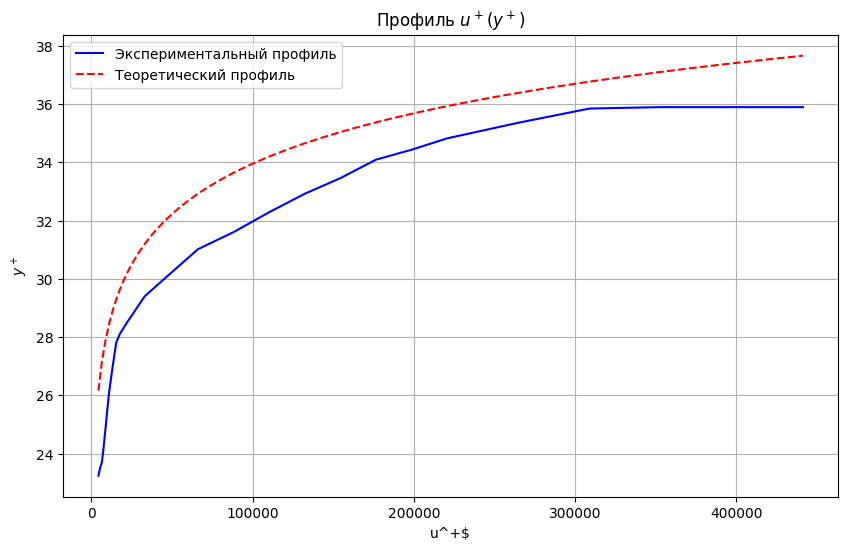

In [66]:
# Вычисление u+ и y+
u_plus = speeds_ms / u_tau_best
# Удаление первого элемента, чтобы не было ошибок в логарифмической функции
u_plus = u_plus[1:]
y_measurements = y_measurements[1:]
y_plus = y_measurements  * u_tau_best / nu_0
# Теоретический профиль
y_plus_theory = np.linspace(min(y_plus), max(y_plus), 200)   # Диапазон значений y+ для теоретического профиля
u_plus_theory = 5.75 * np.log10(y_plus_theory) + 5.2  # Логарифмическая область

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(y_plus, u_plus, label='Экспериментальный профиль', color='blue')
plt.plot(y_plus_theory, u_plus_theory,  label='Теоретический профиль', color='red', linestyle='--')
plt.xlabel('u^+$')
plt.ylabel('$y^+$')
plt.title('Профиль $u^+(y^+)$')
plt.legend()
plt.grid(True)
plt.show()

### 8) Определить локальный коэффициент трения и число Рейнольдса, посчитанное по продольной координате:


$$
C_f = \frac{\tau_w}{\frac{1}{2} \rho u_0^2}
$$

$$
\text{Re}_{x,0} = \frac{u_0 x}{\nu_0}
$$



In [58]:
x=0.63
# Локальный коэффициент трения
C_f = tau_w / (0.5 * rho * u0**2)

# Число Рейнольдса
Re_x0 = (u0 * x) / nu_0

print(f"Локальный коэффициент трения C_f: {C_f:.6f}")
print(f"Число Рейнольдса Re_{{x,0}}: {Re_x0:.4f}")

Локальный коэффициент трения C_f: 0.001552
Число Рейнольдса Re_{x,0}: 499029.5172
